# twissed

* Author: D. Minenna
* Date: January 2024

Tutorial on using the twissed package.
In this notebook, we are presenting a number of beam functions from PIC simulations.

## Import
The import of the package is done by the command:
```python
import twissed
```

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import os

# twissed
import twissed

# Select colormaps
cm = twissed.Cmap()


 twissed (v2.1.1, 2023/01/25)



## Starting with twissed

For fbpic or smilei simulations, we can check the presence of files in the defined directory.

* You must start by initializing a **steps** (plural) object with the directory (`directory` argument) of the data and the source.
* Available sources are:
    * `fbpic`
    * `happi` (for smilei, require happi package for the moment)
    * `smilei` (directly read smilei files)
    * `astra` (directly read smilei files)
    * `tracewin` (directly read smilei files)

### Note
* The `verbose` argument is available on most of skypiea functions. 

In [2]:
# Selection of the directory with data
directory = os.getcwd() + '/data/FBPIC/lab_diags'

# Find all timesteps
steps = twissed.Steps()
steps.find_data(directory=directory,source='fbpic',verbose=True)

c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5
timesteps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


Now we create the **step** object. It will contain all the information about the beam at a given timestep. We can create several step objects per species.

### Range arguments accepted for selection

It is possible to only select a part of the beam adding a range.
        
* **x** (*float*) - Array of position in x, in m
* **y** (*float*) - Array of position in y, in m
* **z** (*float*) - Array of position in z, in m
* **ux** (*float*) - Normalised momenta x: $u_x = \gamma v_x /c = \gamma beta_x$ of the macro-particle of the beam
* **uy** (*float*) - Normalised momenta y: $u_y = \gamma v_y /c = \gamma beta_y$ of the macro-particle of the beam
* **uy** (*float*) - Normalised momenta z: $u_z = \gamma v_z /c = \gamma beta_z$ of the macro-particle of the beam
* **w** (*float*) - Weighs of the macro-particles in term of particles, in number of particles per macro-particles
* **g** (*float*) - Lorentz factor $\gamma$ of every single macro-particles
* **Ek** (*float*) - Relativistic kinetic energy of macro-particles
            
All the above arguments can be added with the '_avg' suffix to force the selection to be performed around the mean value.
* Example: `g_avg`.            

In [3]:
# timestep selection
timestep = steps.timesteps[-1]

# Creation of the step class
step = twissed.Step()

# Read data 
step = steps.read_beam(step,timestep,species='electrons',g=[10,None])
# g=[10,None] means take only particles from gamma Lorentz between 10 and infinity.

# Print attributs obtained
print(step.keys())

Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000036.h5 for species: electrons
['verbose', 'dt', 'time', 'timestep', 'timeUnitSI', 'species', 'w', 'ux', 'uy', 'uz', 'x', 'y', 'z', 'g', 'Ek', 'g_range', 'vz', 'charge', 'N', 'Ek_avg', 'Ek_med', 'Ek_std', 'Ek_mad', 'Ek_std_perc', 'Ek_mad_perc', 'g_avg', 'g_med', 'g_std', 'g_mad', 'sigma_x', 'sigma_y', 'sigma_z', 'sigma_ux', 'sigma_uy', 'sigma_uz', 'sigma_Ek', 'betaz_avg', 'p', 'p_avg', 'dp', 'dp_avg', 'sigma_dp', 'xp', 'yp', 'sigma_xp', 'sigma_yp', 'x_divergence', 'y_divergence', 'x_avg', 'y_avg', 'z_avg', 'xx_avg', 'yy_avg', 'ux_avg', 'uy_avg', 'uz_avg', 'xp_avg', 'yp_avg', 'xpxp_avg', 'ypyp_avg', 'xxp_avg', 'yyp_avg', 'emit_rms_x', 'emit_rms_y', 'emit_norm_rms_x', 'emit_norm_rms_y', 'beta_x', 'beta_y', 'gamma_x', 'gamma_y', 'alpha_x', 'alpha_y', 'xy_avg', 'xyp_avg', 'yxp_avg', 'xpyp_avg', 'xz_avg', 'xdp_avg', 'zxp_avg', 'xpdp_avg', 'yz_avg', 'ydp_avg', 'zyp_avg', 'ypdp_avg', 'zz_avg', 'zdp_avg', 'dp

These are examples of what you get and what you can do with the step class. The default unit is always the same but you can convert it with the function

In [4]:
# Basic print
print(f"N particle: {step.N}")
print(f"Positions: {step.x}")

####
print("")

# Included print (with info)
step.print('emit_norm_rms_y')
step.print('sigma_x')
step.print('charge')
step.print('dt')
step.print('Ek_std_perc')

####
print("")

# step.convert('dt','fs') allows to convert units
print(f"Convert dt: {step.convert('dt','fs')} [fs]")

N particle: 174788
Positions: [ 1.01072428e-06 -2.84989439e-07 -1.57648345e-07 ...  3.05543405e-05
  1.50083167e-06  3.47737828e-07]

2.8178741554952444 [pi.mm.mrad], Normalized trace emittance 1-rms $\gamma \beta \epsilon_{yy'}$ in y
1.792765001973355e-06 [m], RMS size in x.
108.4155653979033 [pC], Total charge of the beam. For electrons : $Q = (\sum_i w_i e) / 1e-12
5.92908991305983e-16 [s], Simulation time step.
3.8751878509786146 [%], Energy spread Ek_std / Ek_avg * 100 of the beam

Convert dt: 0.592908991305983 [fs]


In [5]:
# print beam info
step.print('beam')

sigma_x     : 1.792765001973355e-06 m
sigma_y     : 4.501721601023872e-06 m
sigma_z     : 3.0266759493841664e-06 m
sigma_xp    : 0.00131400761895321 rad
sigma_yp    : 0.00326590759559804 rad
sigma_dp/p  : 3.8659310717355657 %
-----------
eps_N_x     : 0.445346928449047 pi.mm.mrad
alpha_x     : -1.9757197169687015
beta_x      : 0.0030211839750409336 mm/mrad
gamma_x     : 1623.0287332807827 mrad/mm
eps_N_y     : 2.8178741554952444 pi.mm.mrad
alpha_y     : -1.941822143242106
beta_y      : 0.003010679851627666 mm/mrad
gamma_y     : 1584.583373554712 mrad/mm
eps_N_z     : 4.4989379903438245 pi.mm.%
alpha_z     : 0.4306219931419913
beta_z      : 0.0008524143402696185 mm/pi/%
gamma_z     : 13906.796788550366 mrad/mm
eps_4D      : 1.2549315999057593 (pi.mm.mrad)2
eps_6D      : 56.458594500989776 (pi.mm.mrad)3
-----------
Energy mean : 213.4097256232794 MeV
Energy med  : 212.77201453412792 MeV
Energy std  : 8.270027760160119 MeV
Energy std  : 3.8751878509786146 %
Energy mad  : 5.307834361897779

In [6]:
# Print sigma beam matrix
step.print('sigma_matrix')

   x (m)| 3.21401e-12 2.10182e-09 -1.18242e-13 1.20527e-11 1.37587e-13 -2.68716e-09 |
x' (rad)| 2.10182e-09 1.72662e-06 2.97261e-11 4.95055e-08 -4.65404e-11 -9.89257e-07 |
   y (m)| -1.18242e-13 2.97261e-11 2.02655e-11 1.30708e-08 4.30263e-13 -1.80910e-09 |
y' (rad)| 1.20527e-11 4.95055e-08 1.30708e-08 1.06662e-05 1.98567e-10 -2.81583e-06 |
   z (m)| 1.37587e-13 -4.65404e-11 4.30263e-13 1.98567e-10 9.16077e-12 -4.62783e-08 |
    dp/p| -2.68716e-09 -9.89257e-07 -1.80910e-09 -2.81583e-06 -4.62783e-08 1.49454e-03 |


In [7]:
# Create a pandas DataFrame from the step data.
step.DataFrame() 

,verbose,dt,time,timestep,timeUnitSI,charge,N,Ek_avg,Ek_med,Ek_std,...,emit_norm_rms_z,beta_z,gamma_z,alpha_z,emit_norm_rms_4D,emit_norm_rms_6D,x_dispersion,y_dispersion,Ek_hist_peak,Ek_hist_fwhm
0,True,5.929090e-16,2.401661e-11,36,1.0,108.415565,174788,213.409726,212.772015,8.270028,...,4.498938,0.000852,13906.796789,0.430622,1.254932,56.458595,0.000995,-0.001837,210.37967,20.04621


## Plotting 

You can plot directly from the step class. The processing takes into account the weight of each macro-particle.

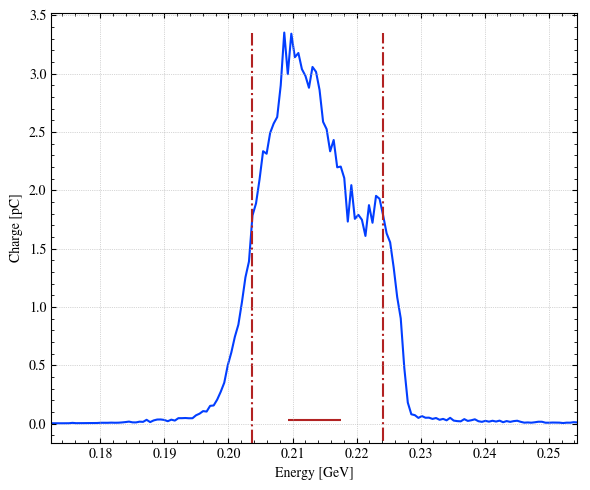

In [8]:
# Simple plot of the x distribution (dQ/dx). Note that x axis is convert in um with xconv. step.sigma_x is the standard deviation (bunch length) in x.
_ = step.hist1D(
    'Ek', # name
    xconv="GeV", # (Optional) Unit wanted
    range_auto=True, # (Optional) Automatic range : between - 5 sigma and 5 sigma
    bins=150,
    plot='plot', # (Optional) Type of plot
    # linestyle='--', 
    fwhm=True, # (Optional) Add lines corresponding the the FWHM
)

In [9]:
# Plot = None to only return the histogram data (y,x)
H, xpos = step.hist1D('Ek',plot=None)

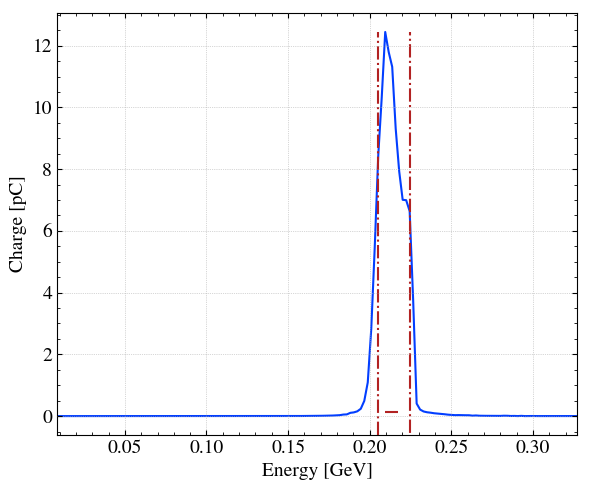

In [10]:
# Simple plot of the x distribution (dQ/dx). Note that x axis is convert in um with xconv. step.sigma_x is the standard deviation (bunch length) in x.
H, xpos = step.hist1D(
    'Ek',
    xconv='GeV',
    xrange=[-3*step.sigma_x*1e6,3*step.sigma_x*1e6], # (Optional) force the range
    bins=150,
    # dx = 1, # Instead of bins
    # linestyle='--', 
    fwhm=True,
)

The ```hist1D()``` function offer serveral options.

In [11]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

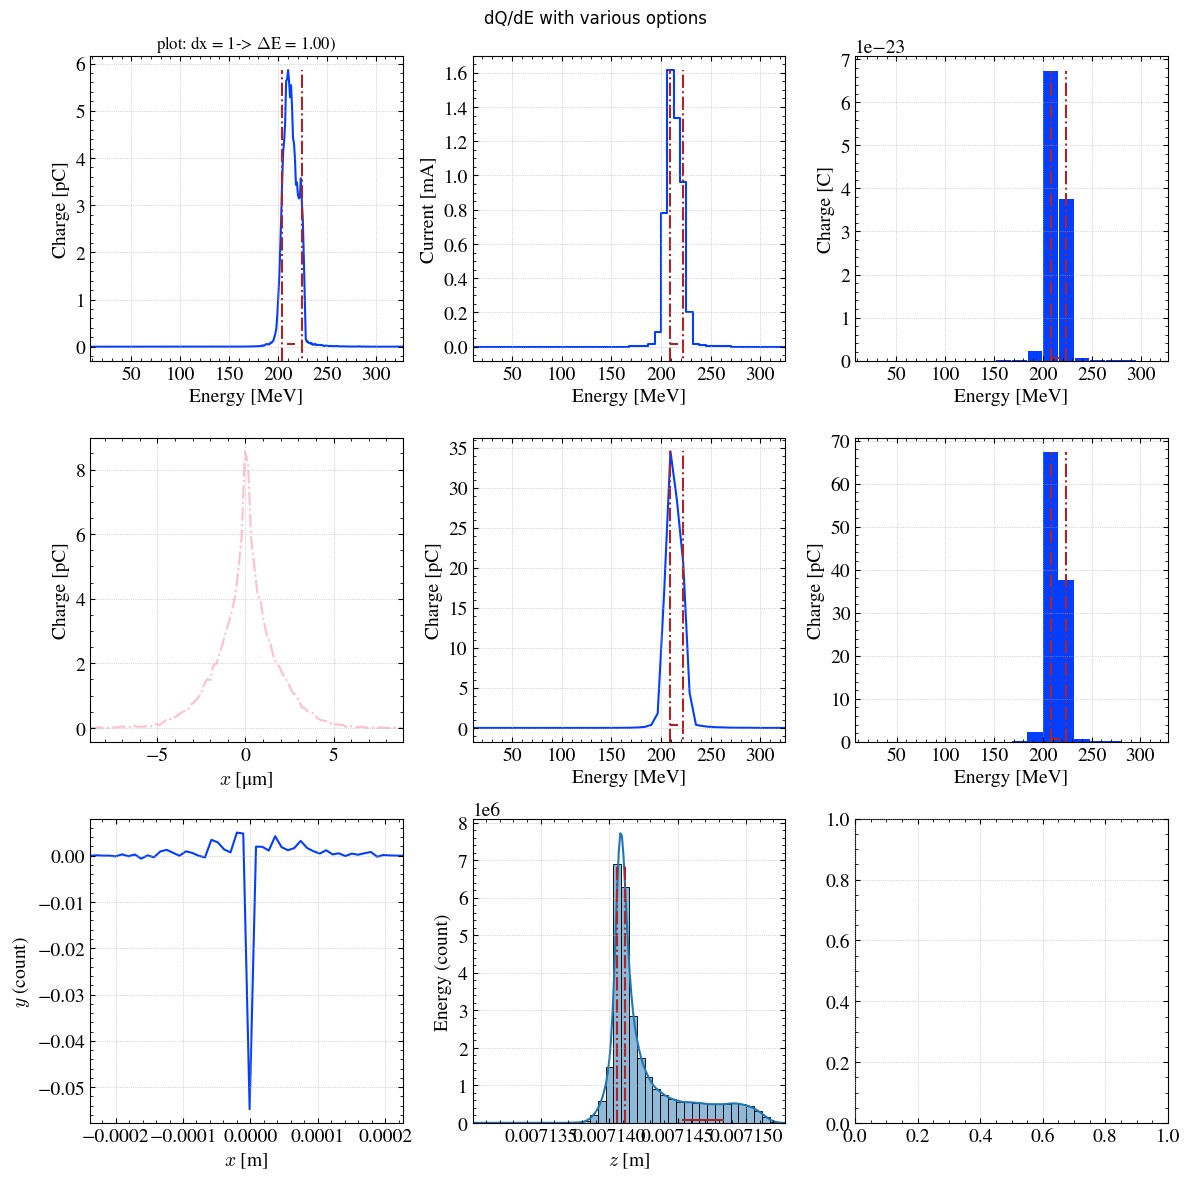

In [12]:
# Instead of directly load a figure with matplotlib (plt.figure), we recommand to add
# with plt.rc_context(twissed.rcParams): 
# to load the custom twissed theme.

# Create the figure
with plt.rc_context(twissed.rcParams):
    fig, axs = plt.subplots(3,3, figsize=(12,12), dpi=100, tight_layout=True)
    
fig.suptitle(f"dQ/dE with various options")

# First axe
ax=axs[0,0]
H, xpos = step.hist1D('Ek',dx=1,plot='plot',ax=ax)
_ = ax.set_title(f"plot: dx = 1-> $\Delta$E = { xpos[1]-xpos[0] :.2f})")

# Second axe
ax=axs[0,1]
H, xpos = step.hist1D("Ek",yname = 'current',yconv="mA",bins=50,plot='step',ax=ax)

ax=axs[0,2]
H, xpos = step.hist1D('Ek',yconv="C",bins=20,plot='bar',ax=ax)

ax=axs[1,0]
H, xpos = step.hist1D('x',xconv="um",range_auto=True,plot='plot',ax=ax,color='pink',linestyle="-.",fwhm=False)

ax=axs[1,1]
H, xpos = step.hist1D('Ek',bins=50,plot='plot',ax=ax)

ax=axs[1,2]
H, xpos = step.hist1D('Ek',bins=20,plot='hist',ax=ax)

ax=axs[2,0]
H, xpos = step.hist1D('x',yname="y",bins=50,plot='lineplot',ax=ax,fwhm=False)

ax=axs[2,1]
H, xpos = step.hist1D('z',yname="Ek",bins=40,plot='histplot',ax=ax)



* `hist2D()` can also be used with serveral options.

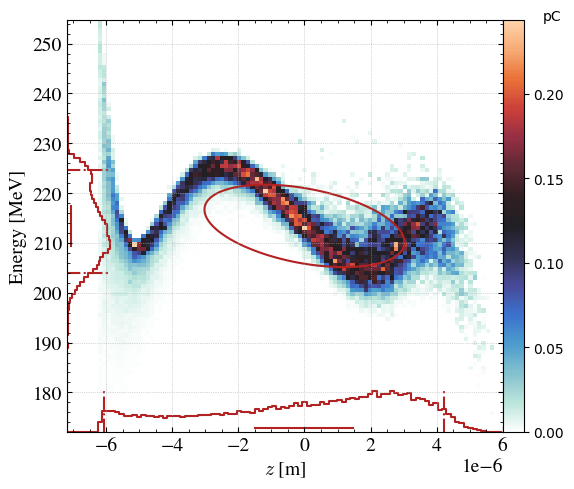

In [13]:
# 2D plot of the beam
_ = step.hist2D(
    'z_avg', # If suffix _avg added, will plot around the average value
    'Ek',
    range_auto=True, # Force range between +- 5 sigma
)

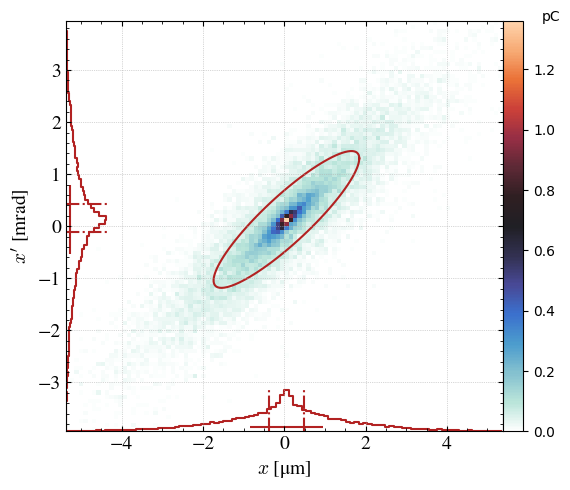

In [14]:
_ = step.hist2D(
    'x',
    'xp',
    xconv='um', # SI units for conversion in the x axis
    yconv='mrad', # SI units for conversion in the y axis
    xrange=[- 3*step.sigma_x / twissed.micro, 3*step.sigma_x / twissed.micro], # Range in x
    yrange=[- 3*step.sigma_xp / twissed.milli, 3*step.sigma_xp / twissed.milli], # Range in y
)

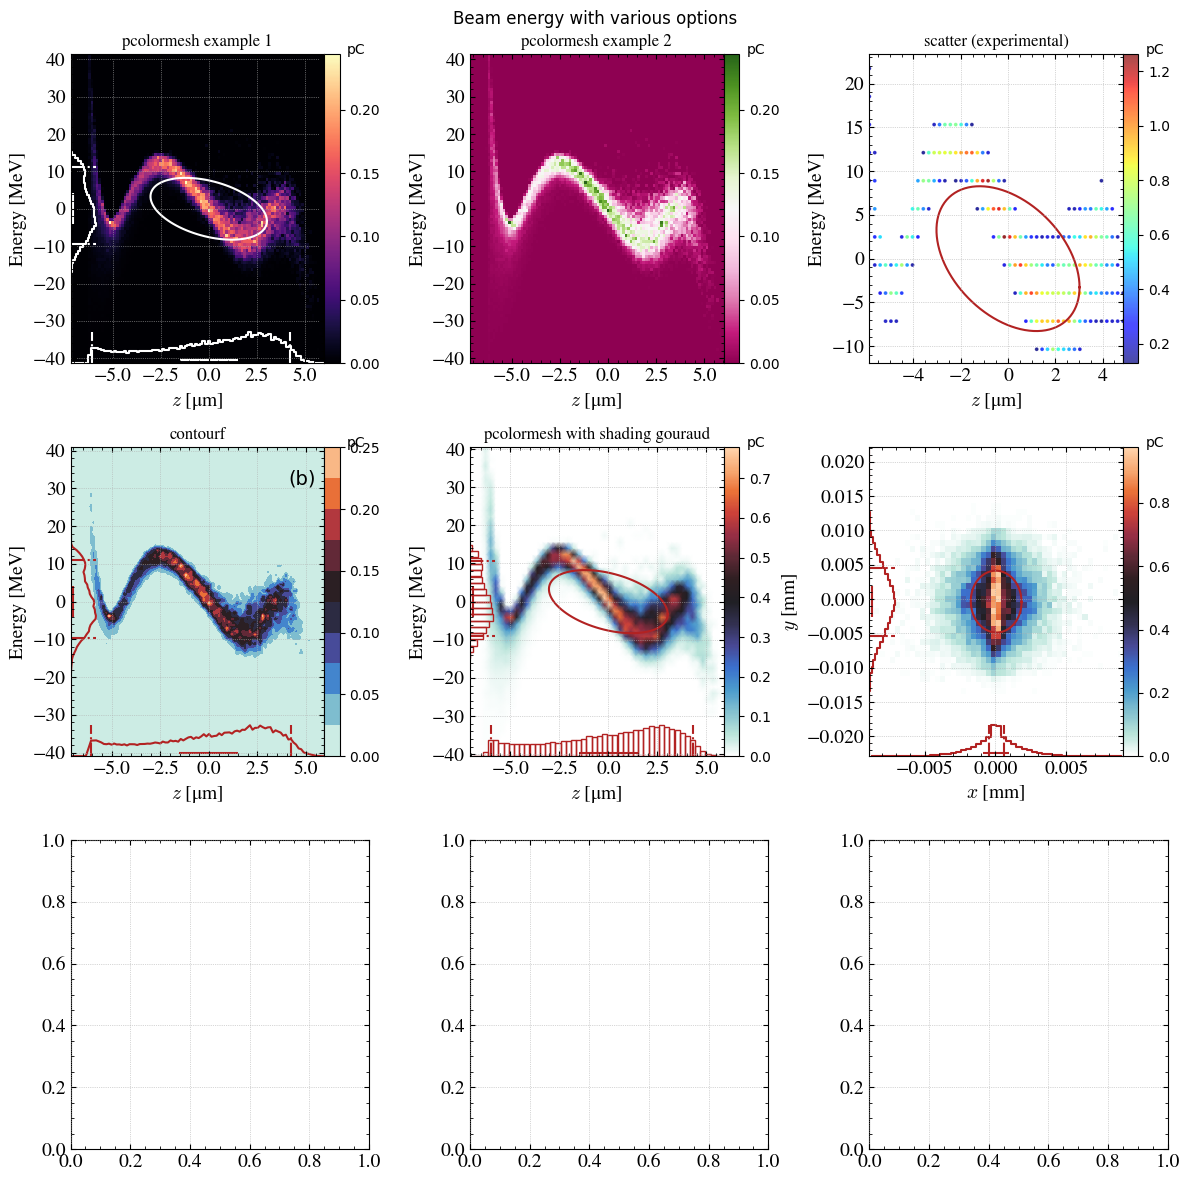

In [15]:
with plt.rc_context(twissed.rcParams): # Figure formatting
    fig, axs = plt.subplots(3,3, figsize=(12,12), dpi=100, tight_layout=True)

fig.suptitle(f"Beam energy with various options")

ax = axs[0,0]
_ = step.hist2D(
    'z_avg',
    'Ek_avg',
    xconv='um',
    range_auto=True,
    cmap=cm.magma,
    marginals_color = "white",
    emit_color = 'white',
    ax=ax,
)
_ = ax.set_title(f"pcolormesh example 1")

ax = axs[0,1]
_ = step.hist2D(
    'z_avg',
    'Ek_avg',
    xconv='um',
    range_auto=True,
    marginals_step = False,
    set_yticks = False,
    cmap="PiYG",
    ax=ax,
    emit=False,
    grid=False,
)
_ = ax.set_title(f"pcolormesh example 2")

ax = axs[0,2]
_ = step.hist2D('z_avg','Ek_avg',xconv='um',plot='scatter',cmap='jet',ax=ax,size=12,marker='.',alpha=0.7,
    marginals_step = False)
_ = ax.set_title(f"scatter (experimental)")

ax = axs[1,0]
_ = step.hist2D(
    'z_avg',
    'Ek_avg',
    xconv='um',
    plot='contourf',
    range_auto=True,
    marginals_plot = True,
    ax=ax,
    emit=False,
    panel_text="(b)",
)
_ = ax.set_title(f"contourf")

ax = axs[1,1]
_ = step.hist2D(
    'z_avg',
    'Ek_avg',
    xconv='um',
    range_auto=True,
    bins=[50,50],
    shading='gouraud',
    marginals_bar = True,
    ax=ax,
)
_ = ax.set_title(f"pcolormesh with shading gouraud")

ax = axs[1,2]
_ = step.hist2D(
    'x',
    'y',
    xconv='mm',
    yconv='mm',
    range_auto=True,
    bins=[50,50],
    # shading='gouraud',
    # marginals_bar = True,
    ax=ax,
)

The `plotbeam` function is a good trade-off.

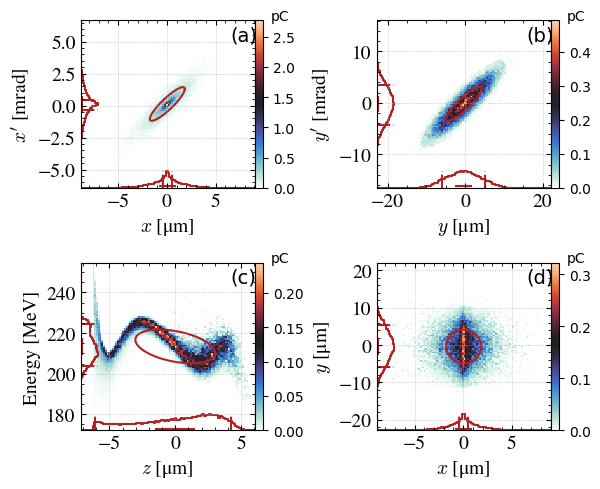

In [16]:
_ = step.plot_beam(
    range_auto=True,
    # xrange=[-3*step.sigma_x*1e6,3*step.sigma_x*1e6],
    # xprange=[-3*step.sigma_xp*1e3,3*step.sigma_xp*1e3],
    # yrange=[-5*step.sigma_y*1e6,5*step.sigma_y*1e6],
    # yprange=[-6*step.sigma_yp*1e3,6*step.sigma_yp*1e3],
    # zrange=[-10,10],
    # energyrange=[150,300],
)

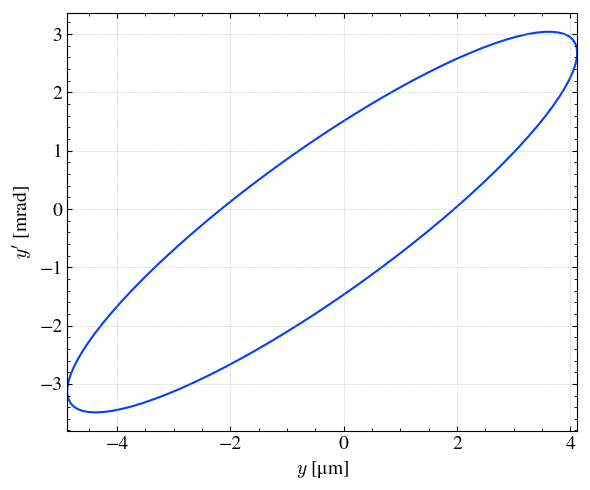

In [17]:
x, y = step.plot_emit('y','yp',xconv='um',yconv='mrad')

In [18]:
step.print('sigma_dp')

0.038659310717355656 [%], Standard deviation (std) of the particle momenta variation in percentage.


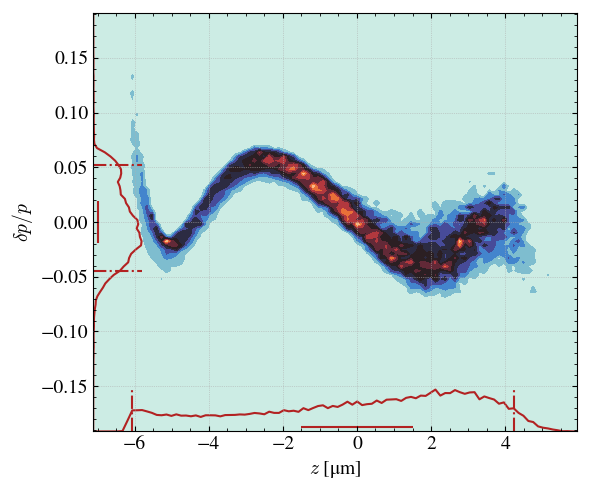

In [19]:
_ = step.hist2D(
  'z_avg',
  'dp',
  xconv='um',
  range_auto=True,
  marginals_plot = True,
  plot='contourf',
  emit=False,
  iscbar=False,
)

## Beam rotation

One can rotate the beam. For instance to reduce the $y$ emittance (but increase the $x$ emittance), we can rotate the beam. At 45°, both emittances are about the same. 

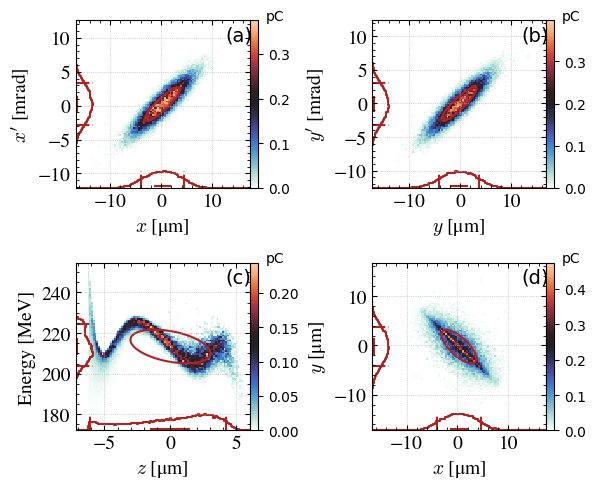

In [20]:
angle = 45 * np.pi / 180 # en radian

step_new = step.rotationXY(angle) # Create a new Step class

_ = step_new.plot_beam(
  range_auto=True,
)

## Re-use the data for other plots

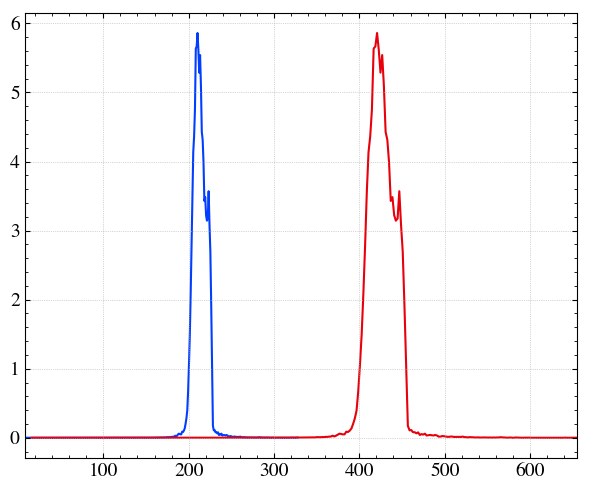

In [21]:
H, xpos = step.hist1D(
    'Ek',
    dx=1,
    plot=None,
)

with plt.rc_context(twissed.rcParams): # Figure formatting
    fig, ax = plt.subplots()
ax.plot(xpos,H)
# same plot but with x=2x
ax.plot(xpos*2,H)

<a list of 7 text.Text objects>

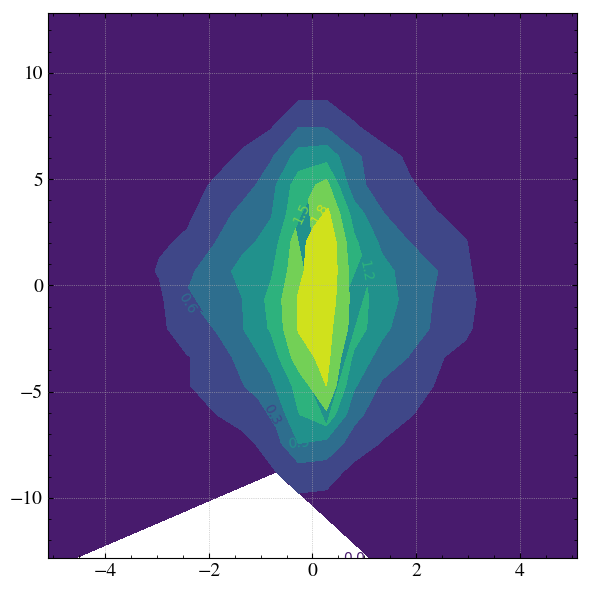

In [22]:
H, xpos, ypos = step.hist2D(
    'x',
    'y',
    xconv='um',
    yconv='um',
    xrange=[- 3*step.sigma_x*1e6, 3*step.sigma_x*1e6],
    yrange=[- 3*step.sigma_y*1e6, 3*step.sigma_y*1e6],
    bins=[20,20],
    plot=None, # Only return the H, xpos, ypos values without plotting anything. 
)


with plt.rc_context(twissed.rcParams): # Figure formatting
    fig, ax = plt.subplots(figsize=(6,6), dpi=100, tight_layout=True)

X, Y = np.meshgrid(xpos, ypos)
g = ax.contourf(X,Y,H,6)
ax.clabel(g,inline=True)